## Loan Prediction Model 


The goal of this project is that from the data collected on the loan’s applicants, preprocess the data and predict based on the information who will be able to receive the loan or not.


In the Dataset we find the following features:

1. Loan ID, the identifier code of each applicant.
2. Gender, Male or Female for each applicant.
3. Married, the maritage state.
4. Dependents, how many dependents does the applicant have?
5. Education, the level of education, graduate or non graduate
6. Self Employed, Yes or No in the case
7. Applicant Income
8. Coapplicant Income
9. Loan Amount
10. Loan Amount Term
11. Credit History, just Yes or No in the case
12. Property Area, urban, semiurban or rural area of the applicant’s property

Loan Status, Yes or No ( The independent variable represents the class)

## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read & visualize the data

In [2]:
df= pd.read_csv('Loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##  Data Analysis

In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Loan Status Encoding
df= df.replace({"Loan_Status":{'Y': 1, 'N': 0}})

#Gender Encoding
df= df.replace({"Gender":{"Male":1, "Female":0 }})

#Married Encoding
df =df.replace({"Married" :{"Yes":1, "No":0}})

#Replace the 3+ in dependents ande make the column numeric
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

#Count the quantity of values on the column
df['Self_Employed'].value_counts()
df= df.replace({"Self_Employed":{"Yes":1, "No":0 }})

#Education Encoding
df['Education'].value_counts()
df= df.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

#Drop the Loan ID column
df = df.drop('Loan_ID',axis=1)

#Property Area Encoding
df['Property_Area'].value_counts()
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

print(df)


     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0          1            0.0             5849   
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0          1            0.0             2900   
610     1.0      1.0         3.0          1            0.0             4106   
611     1.0      1.0         1.0          1            0.0             8072   
612     1.0      1.0         2.0          1            0.0             7583   
613     0.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [8]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.087948,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [9]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1


In [10]:
df.fillna(df.median(), inplace=True)
columns = df.columns
for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

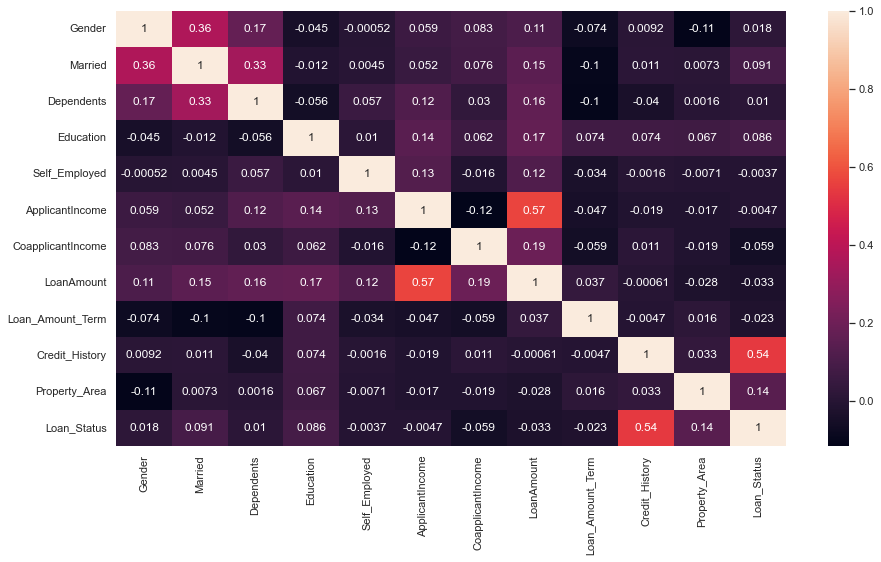

In [11]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True,cmap="rocket")
plt.show()

In [12]:
def correlationdrop(df, sl):
    columns = df.columns
    for column in columns:
        C=abs(df[column].corr(df['Loan_Status']))
        if C < sl:
            df=df.drop(columns=[column])
    return df

df= correlationdrop(df,0.05)

print(df)

     Married  Education  CoapplicantIncome  Credit_History  Property_Area  \
0        0.0          1                0.0             1.0              1   
1        1.0          1             1508.0             1.0              0   
2        1.0          1                0.0             1.0              1   
3        1.0          0             2358.0             1.0              1   
4        0.0          1                0.0             1.0              1   
..       ...        ...                ...             ...            ...   
609      0.0          1                0.0             1.0              0   
610      1.0          1                0.0             1.0              0   
611      1.0          1              240.0             1.0              1   
612      1.0          1                0.0             1.0              1   
613      0.0          1                0.0             0.0              2   

     Loan_Status  
0              1  
1              0  
2              1  

## Separate the variables

In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Scale the data

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(x)

## Split the data

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
z=model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,z)

0.8292682926829268

## SVM Classifier

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[14 19]
 [ 2 88]]
Accuracy: 80.44 %
Standard Deviation: 4.59 %
